In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("2022-03-04-spotify.json")

In [3]:
data["endTime"] = pd.to_datetime(data["endTime"], format='%Y-%m-%d %H:%M')
data["month"] = data["endTime"].dt.to_period("M")

In [4]:
pivot_1 = data.pivot_table(values="msPlayed", columns="month", index="artistName", fill_value=0.0, aggfunc=np.sum)
pivot_1 = pivot_1.loc[(pivot_1!=0).any(axis=1), "2021-06":"2021-12"]
pivot_1 = pivot_1.loc[pivot_1.sum(axis = 1).sort_values(ascending = False).index][:100]
pivot_1

month,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
artistName,,,,,,,
Tristam,45759039,8384051,21082347,25976707,16338292,16198019,42075194
ILLENIUM,4864156,19632684,13338372,13629200,12611913,65877389,37353173
Sullivan King,29623495,27936175,7336617,8046804,19154626,16893357,13239254
Architects,24996171,38028417,24550736,13163429,3228658,3010222,4752912
Seven Lions,5490138,12008038,9797441,16467303,21611748,12679889,14283673
...,...,...,...,...,...,...,...
Rogue,1130617,1572793,260494,1258216,1079099,1862800,615957
Marc Anthony,0,3312396,3670460,537708,205201,0,0
Dodge & Fuski,0,0,0,0,1972357,4172051,1227393


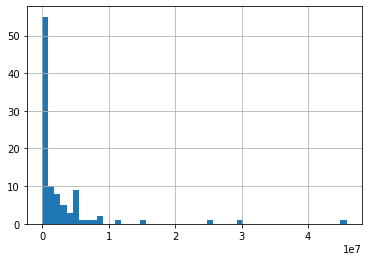

In [5]:
pivot_1["2021-06"].hist(bins = 50)
plt.show()

<AxesSubplot:title={'center':'listening activity 2021-06'}, xlabel='artistName'>

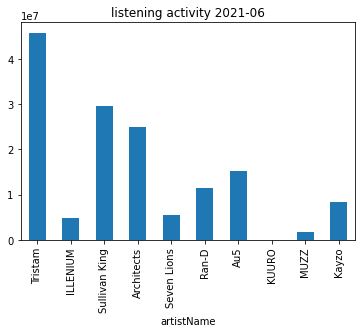

In [6]:
pivot_1["2021-06"][:10].plot(kind = "bar",
                             title = "listening activity 2021-06")

In [7]:
tristam_month = data[data["artistName"] == "Tristam"].groupby("month").agg(np.sum).reset_index()
tristam_month

,month,msPlayed
0,2021-03,38561092
1,2021-04,103819909
2,2021-05,67421186
3,2021-06,45759039
4,2021-07,8384051
5,2021-08,21082347
6,2021-09,25976707
7,2021-10,16338292
8,2021-11,16198019
9,2021-12,42075194


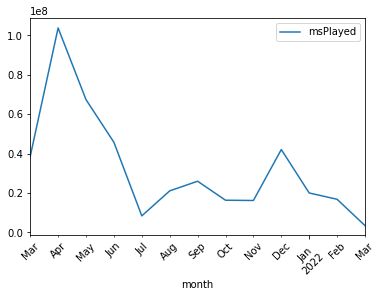

In [8]:
tristam_month.plot(x = "month", y = "msPlayed", kind = "line", rot = 45)
plt.show()

The following plots dont make any sense, but they work :)

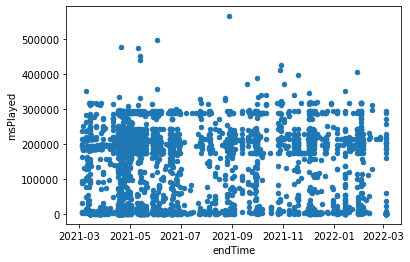

In [9]:
data[data["artistName"] == "Tristam"].plot(x = "endTime", y = "msPlayed", kind = "scatter")
plt.show()

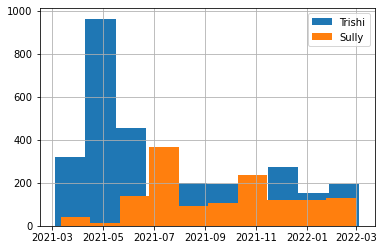

In [10]:
data[data["artistName"] == "Tristam"]["endTime"].hist()
data[data["artistName"] == "Sullivan King"]["endTime"].hist()
plt.legend(["Trishi", "Sully"])
plt.show()